___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 9<br><br>RNN Syntax Basics<br><br>Sine Wave<br><h1>

# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

Biz burada kendimiz bir data oluşturacağız. 0 ve 50 arasında 501 tane nokta oluşturacağız bir de onların sinüslerini alıyoruz

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

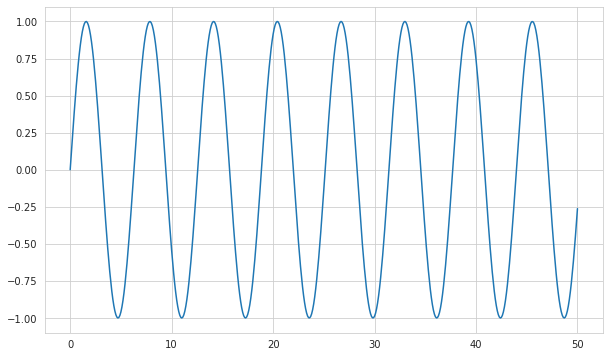

In [5]:
plt.plot(x,y) 

Biz şimdi çıkan bu sonucu elimizdeki datalarda forecast yapmak.

Let's turn this into a DataFrame

Sinüs değerlerini ve sayıları dataframe'e atıyoruz.

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])  

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

Biz normalde datamızı random olarak bölüyorduk. Fakat RNN ile çalışırken datamızın sırasını bozmayız. Çünkü bizim için datamızın sırası önemli. Datamızın test için son kısmını ayırırız.

In [8]:
len(df) 

501

 yüzde 15'ini ayırıyoruz.

In [9]:
test_percent = 0.15

bu da 75%'e denk geliyormuş.

In [10]:
len(df)*test_percent 

75.14999999999999

datayı böleceğim index sayım bu

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

75'i çıkarttık ve 426 kaldı. Yani biz baştan 426. sayıdan bölme işlemini yapacağız.
Baştan 426 satır bizim train datamız. 426'dan sonraki 75 datam iste test datam olacak.

In [12]:
test_ind = int(len(df) - test_point)
test_ind

426

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [15]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler # her zamanki minmax scaler'ı kullanıyoruz.

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

TimseriesGenerator = CNN'de gördüğümüz imagedatagenerator diyebiliriz. Benzer işlemleri yapıyorlar. Yani datamızı modele sokmaya hazır hale getirecek.

Timeseriesgenerator amacımız --> Mesela datamızdaki ilk 3 satırı alacağız daha sonra 4. sünü tahmin etmesini isteyeceğiz. Daha sonra çıkan 4. sonuç ve ilk 3 satırı tekrar alarak bu sefer 5. sini tahmin etmeye çaışacağız. Bu şekilde tüm train datamızı ayarlamaya çalışıyoruz.

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#help(TimeseriesGenerator)

In [21]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

**length** --> yani burada ilk 2'sinden 3.sünü tahmin edeceğiz.
**batch_Size** --> Kaç tane bu şekilde hazırladığım datayı aynı anda modele sokacağım. Bir batchimde bu şekilde kaç tane data olacak bunu belirliyorum. Genel olarak tavsiye edilen tek tek yapılması ama büyük datasetlerinde bunu yapmak mümkün değil. Onlarda batcg_size büyüteceğiz.
**stride** ---> CNN'de gördüğümüzün aynısı. Stride ne kadar kaydırarak gideceğimizi söyler. Stride 1 olduğu için --> ilk 2 tane satırdan 3. sünü daha sonra elde edilen ve bir önceki satır ile tahmin yapacağız. Özetlemek gerekirse:

x
y

_x ve y ile z'yi tahmin ediyoruz:_
x
y
z

_daha sonra y ve z ile p'yi tahmin ediyoruz:_
y
z


In [22]:
len(train_scaled)

426

In [23]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

424

Normalde 426 tane datamız var ama bize 424 tane döndürmüş generator. NEDEN?

Çünkü Data setinin son 2 tanesinde tahmin ettirecek bir şey bulamadığı için son 2 satırı kullanamıyor.

Biz bunu bir de length=3, batch_size=2, stride=2 vererek tekrardan denedik ve o zaman generator 106 verdi mesela

In [24]:
generator

In [25]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [26]:
# What does the first batch look like?
X, y = generator[0]

In [27]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


In [28]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

<AxesSubplot:>

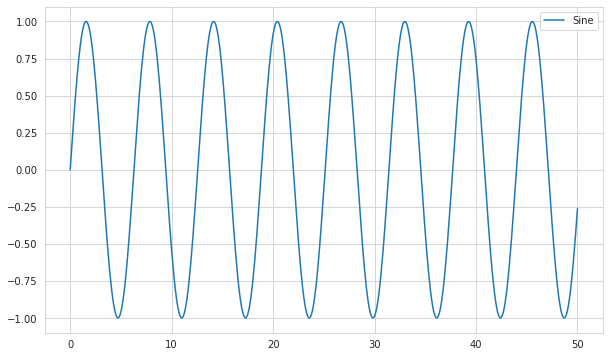

In [29]:
df.plot()

The more length the more training time

In [30]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [31]:
# What does the first batch look like?
X, y = generator[0]

In [32]:
len(generator) # 426-64=362

362

In [33]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')
# 64 tane satıra bakarak 65. yi tahmin edecek. --> many to one.

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
# basit modellerde simpleRNN kullanabiliriz.

In [35]:
# We're only using one feature in our time series
n_features = 1

In [36]:
seed = 42

**input_shape** önemli. İlki satır ikincisi sütundu. Dolayısıyla 64'e 1 bir data gelmesini bekleriz burada.

**activation**'da defaultumuz tanh'dır.


In [37]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features))) 
# Final Prediction
model.add(Dense(units = 1)) # continuous bir veri tahmin edeceğiz bu yüzden bir tane output layerım var.

model.compile(optimizer='adam', loss='mse') # bir class tahmin etmeyeceğimiz için 'mse' kullanıyoruz.
# 64'e 1'lik uzun ince bir data geliyor array olarak...

2022-03-18 11:09:18.093371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 11:09:18.196568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 11:09:18.197406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 11:09:18.198701: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100)               10200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [39]:
# params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2))

10200

In [40]:
model.fit_generator(generator = generator, epochs = 5)
# fit_generator ilerde kalkacakmış :') 

Epoch 1/5


2022-03-18 11:09:20.658130: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


362/362 [==============================] - 19s 49ms/step - loss: 0.0095
Epoch 2/5
362/362 [==============================] - 18s 51ms/step - loss: 1.8962e-04
Epoch 3/5
362/362 [==============================] - 19s 52ms/step - loss: 0.0011
Epoch 4/5
362/362 [==============================] - 18s 49ms/step - loss: 1.4722e-05
Epoch 5/5
362/362 [==============================] - 19s 51ms/step - loss: 3.6441e-04


<AxesSubplot:>

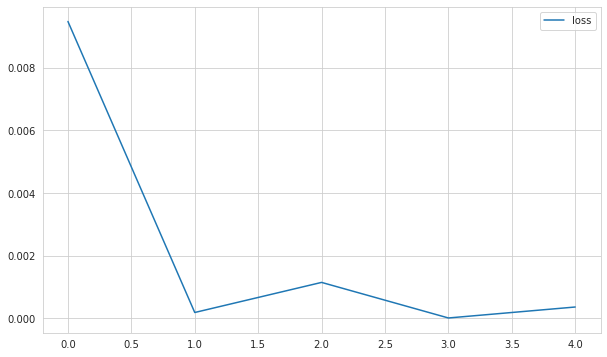

In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Herhangi bir validation datamız olmadığı için overfit var mı yok mu göremiyoruz ama bu grafiğe göre eğitilmiş gibi gözüküyor.

## Evaluate on Test Data

Length'imizin uzunluğu ne kadarsa o kadar tahmin yapmakta fayda var, daha ilerisi forecast'i bozabilir.

In [42]:
first_eval_batch = train_scaled[-length:]

In [43]:
first_eval_batch.shape

(64, 1)

Modelimiz bizden (1, 64, 1) 3 boyutlu bir girdi bekliyor prediction yapabilmek için çünkü bunlarla eğitildi.

In [44]:
generator[0][0].shape 

(1, 64, 1)

In [45]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

In [46]:
first_eval_batch.shape

(1, 64, 1)

Aşağıdaki kodu çalışıtrdığımızda bize 1 tane değer dönderecek. 65. değerin ne olduğunu verecek bize. 

Peki, biz bunu neyle kıyaslayacağız? --> Test datamın ilk elemanıyla

In [47]:
model.predict(first_eval_batch)  # bu output'u aşağıda kullanacağız!

array([[0.00767993]], dtype=float32)

Bakıyoruz ve değerimize yakın olduğunu görüyoruz. Başarılı!

In [48]:
test_scaled[0] # dikkat bu datamız 2 boyutlu bir array.

array([0.00885189])

In [49]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [50]:
current_batch.shape

(1, 64, 1)

Current batch'imiz bizim 64'lük datamız oluyor.

In [51]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [52]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1)   # 3 boyutlu olduğu için 

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

In [53]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1) # current_batch'i her seferinde güncelleyecek.

In [54]:
predictions_scaled # scale edilmiş predictionlar

[array([0.00767993], dtype=float32),
 array([0.01849581], dtype=float32),
 array([0.03391406], dtype=float32),
 array([0.0528969], dtype=float32),
 array([0.07623009], dtype=float32),
 array([0.10312187], dtype=float32),
 array([0.13308217], dtype=float32),
 array([0.16645715], dtype=float32),
 array([0.2026678], dtype=float32),
 array([0.24173027], dtype=float32),
 array([0.28309926], dtype=float32),
 array([0.3268975], dtype=float32),
 array([0.3732857], dtype=float32),
 array([0.42122042], dtype=float32),
 array([0.47075334], dtype=float32),
 array([0.5221275], dtype=float32),
 array([0.5741481], dtype=float32),
 array([0.6262784], dtype=float32),
 array([0.6788491], dtype=float32),
 array([0.73042744], dtype=float32),
 array([0.7797888], dtype=float32),
 array([0.82741684], dtype=float32),
 array([0.87160903], dtype=float32),
 array([0.9111263], dtype=float32),
 array([0.9464658], dtype=float32),
 array([0.97640544], dtype=float32),
 array([1.0003375], dtype=float32),
 array([1.018

In [55]:
test_scaled  # scale edilmiş test datalarım

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

**inverse_transform** ile scale edilmiş halinden kurtarıyoruz.

In [56]:
predictions = scaler.inverse_transform(predictions_scaled) 

In [57]:
predictions

array([[-0.98463047],
       [-0.96299888],
       [-0.93216264],
       [-0.89419725],
       [-0.84753126],
       [-0.79374812],
       [-0.73382801],
       [-0.66707859],
       [-0.59465785],
       [-0.51653354],
       [-0.43379622],
       [-0.34620045],
       [-0.25342478],
       [-0.15755612],
       [-0.05849108],
       [ 0.04425643],
       [ 0.14829682],
       [ 0.25255654],
       [ 0.3576971 ],
       [ 0.46085296],
       [ 0.55957486],
       [ 0.65483019],
       [ 0.74321387],
       [ 0.8222478 ],
       [ 0.89292618],
       [ 0.95280501],
       [ 1.0006687 ],
       [ 1.03638995],
       [ 1.05979389],
       [ 1.0714744 ],
       [ 1.07014284],
       [ 1.05736371],
       [ 1.03460493],
       [ 0.99972874],
       [ 0.95551807],
       [ 0.90342474],
       [ 0.84141114],
       [ 0.77164398],
       [ 0.69570661],
       [ 0.61238761],
       [ 0.52273901],
       [ 0.42850339],
       [ 0.32946928],
       [ 0.22573348],
       [ 0.11907253],
       [ 0

In [58]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [59]:
test['RNN_Predictions'] = predictions # predictionlarımızı 'RNN Predicstions'a atıyoruz

In [60]:
test

,Sine,RNN_Predictions
42.600,-0.982,-0.985
42.700,-0.959,-0.963
42.800,-0.925,-0.932
42.900,-0.883,-0.894
43.000,-0.832,-0.848
...,...,...
49.600,-0.617,-0.614
49.700,-0.536,-0.523
49.800,-0.449,-0.429
49.900,-0.357,-0.337


Aşağıdaki plot'a göre gayet iyi gözüküyor.

<AxesSubplot:>

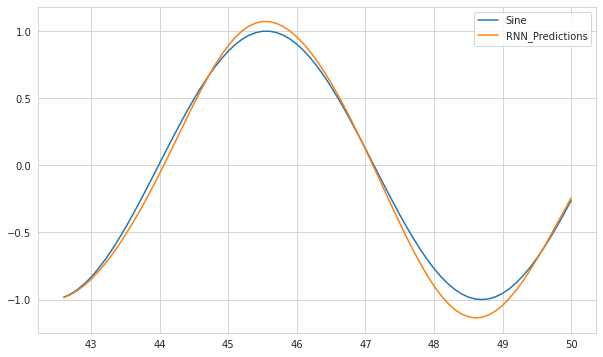

In [61]:
test.plot()

## Early Stopping and Validation Generator

Early stop yapacağız ama bunun için validation data lazım

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

Burda önemli bir nokta var. 

Test range 75, length'im ise 64. 64'den küçük bir sayı tercih etseydik burada, herhangi bir data üretemez. En az 65 olması lazım ki üretsin.

In [64]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)

Aslında yukarda yaptığımız aynı işlem, değişen bir şey yok. Tek farkımız validation_generator tanımlarken bu sefer test datamı hem data olarak hem target olarak veriyoruz.

In [65]:
len(validation_generator)  # 75-64'ten 11 tane üretmiş.

11

## LSTM

LSTM'in RNN'den farkı yok sadece RNN yerine LSTM yazdık.

In [66]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

LSTM yazınca parametre sayımız bir anda 4'e katlandı. 10200'dü, 40800 oldu.

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [68]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

Early stop'ımız olduğu için epoch'a 20 verdik.

In [69]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20


2022-03-18 11:11:01.163644: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


362/362 [==============================] - 5s 6ms/step - loss: 0.0110 - val_loss: 1.4525e-04
Epoch 2/20
362/362 [==============================] - 2s 6ms/step - loss: 2.6896e-04 - val_loss: 2.4426e-05
Epoch 3/20
362/362 [==============================] - 2s 5ms/step - loss: 4.2661e-05 - val_loss: 8.5698e-06
Epoch 4/20
362/362 [==============================] - 2s 5ms/step - loss: 9.4770e-05 - val_loss: 2.1497e-06
Epoch 5/20
362/362 [==============================] - 2s 5ms/step - loss: 0.0015 - val_loss: 2.2630e-05
Epoch 6/20
362/362 [==============================] - 2s 5ms/step - loss: 1.2590e-05 - val_loss: 5.0752e-07
Epoch 7/20
362/362 [==============================] - 2s 6ms/step - loss: 8.4093e-06 - val_loss: 1.6786e-05
Epoch 8/20
362/362 [==============================] - 2s 5ms/step - loss: 9.0154e-06 - val_loss: 6.3392e-07


<AxesSubplot:>

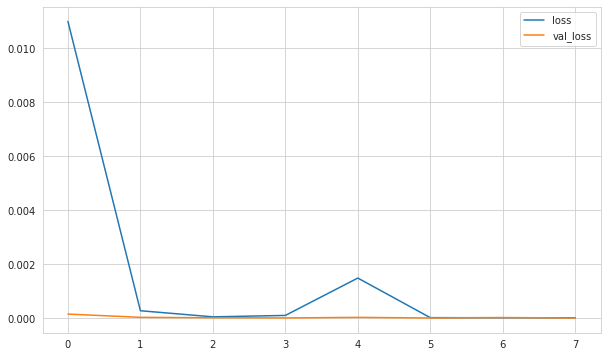

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Yukarda yaptığımızın aynısını burda da uyguluyoruz (Prediction alma işlemi)

In [71]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [72]:
predictions = scaler.inverse_transform(predictions_scaled)
test['LSTM Predictions'] = predictions
test

,Sine,RNN_Predictions,LSTM Predictions
42.600,-0.982,-0.985,-0.980
42.700,-0.959,-0.963,-0.957
42.800,-0.925,-0.932,-0.924
42.900,-0.883,-0.894,-0.883
43.000,-0.832,-0.848,-0.832
...,...,...,...
49.600,-0.617,-0.614,-0.506
49.700,-0.536,-0.523,-0.427
49.800,-0.449,-0.429,-0.344
49.900,-0.357,-0.337,-0.258


LSTM de RNN ile benzer sonuç döndürmüş. Burada LSTM'in farkını çok göremedik çünkü datamız çok basic.

<AxesSubplot:>

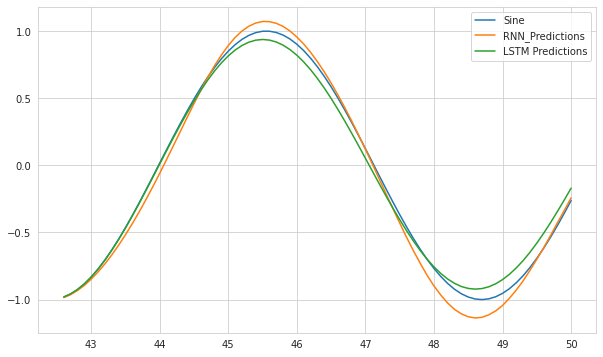

In [73]:
test.plot()

## Retrain and Forecasting

Şimdi tüm datamla modeli oluşturacağız ve üzerine forecast yapacağız.

In [74]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [75]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)
# yukardaki aynı özelliklerle tekrar eğittik datamızı

Modelimin her şeyi aynı ama artık epoch 6 verdik early stopta öyle olduğu için.

In [76]:
model = Sequential()
model.add(LSTM(100, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)

Epoch 1/6
437/437 [==============================] - 4s 6ms/step - loss: 0.0119
Epoch 2/6
437/437 [==============================] - 2s 5ms/step - loss: 3.8463e-04
Epoch 3/6
437/437 [==============================] - 2s 5ms/step - loss: 4.3466e-04
Epoch 4/6
437/437 [==============================] - 2s 5ms/step - loss: 8.9033e-05
Epoch 5/6
437/437 [==============================] - 3s 6ms/step - loss: 1.3344e-04
Epoch 6/6
437/437 [==============================] - 2s 5ms/step - loss: 8.0769e-04


In [77]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [78]:
forecast = scaler.inverse_transform(forecast)

In [79]:
forecast

array([[-0.1619933 ],
       [-0.0590786 ],
       [ 0.04581842],
       [ 0.15183635],
       [ 0.25807708],
       [ 0.36361246],
       [ 0.46749334],
       [ 0.56875963],
       [ 0.6664524 ],
       [ 0.75962659],
       [ 0.84736726],
       [ 0.92880503],
       [ 1.00313321],
       [ 1.06962261],
       [ 1.1276363 ],
       [ 1.17664118],
       [ 1.21621477],
       [ 1.24604999],
       [ 1.2659554 ],
       [ 1.27584874],
       [ 1.27575075],
       [ 1.26577444],
       [ 1.24611365],
       [ 1.21702944],
       [ 1.1788401 ],
       [ 1.13190968],
       [ 1.07663993],
       [ 1.01346285],
       [ 0.94283931],
       [ 0.86525543],
       [ 0.78122595],
       [ 0.69129685],
       [ 0.5960513 ],
       [ 0.49611681],
       [ 0.39217227],
       [ 0.28495498],
       [ 0.17526746],
       [ 0.06398076],
       [-0.04796564],
       [-0.15956735],
       [-0.26976591],
       [-0.37746254],
       [-0.48153916],
       [-0.58088253],
       [-0.6744113 ],
       [-0

In [80]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


<AxesSubplot:>

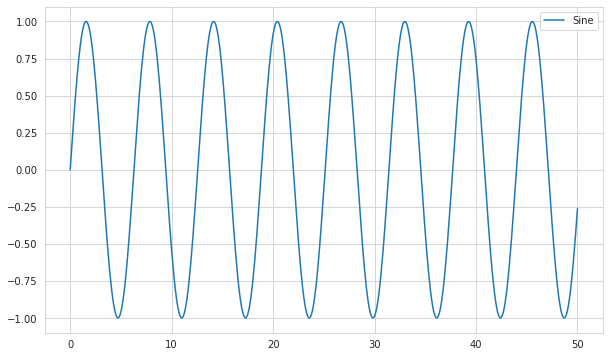

In [81]:
df.plot()

In [82]:
forecast_len = len(forecast)
forecast_len

64

In [83]:
step = 0.1

In [84]:
forecast_len * step # forecast index'i oluşturmak için yaptık bunu.

6.4

In [85]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [86]:
len(forecast_index) # 64 tane index oluşturduk

64

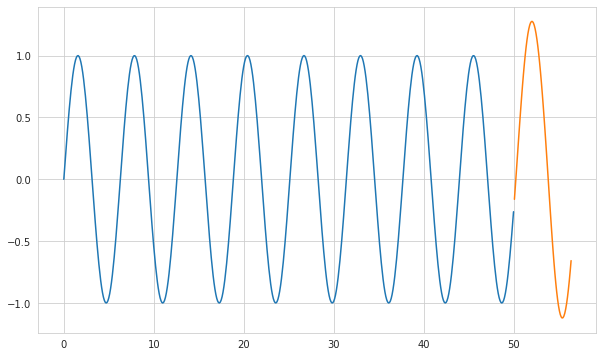

In [87]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___